## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Importing data

In [2]:
data=pd.read_csv("C:\\Users\\hp\\Downloads\\loan_data.csv")
print(data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001013    Male     Yes          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
376  LP002953    Male     Yes         3+      Graduate            No   
377  LP002974    Male     Yes          0      Graduate            No   
378  LP002978  Female      No          0      Graduate            No   
379  LP002979    Male     Yes         3+      Graduate            No   
380  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0       128.0           

## Basic Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


## Data Cleaning

## Empty cells

In [4]:
del data['Loan_Amount_Term']
del data['Credit_History']
del data['Self_Employed']

In [5]:
data.isna().sum()

Loan_ID              0
Gender               5
Married              0
Dependents           8
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Property_Area        0
Loan_Status          0
dtype: int64

### Check Duplicates

In [6]:
print('Number of duplicated rows: ' , len(data[data.duplicated()]))

Number of duplicated rows:  0


## Plotting Boxplot

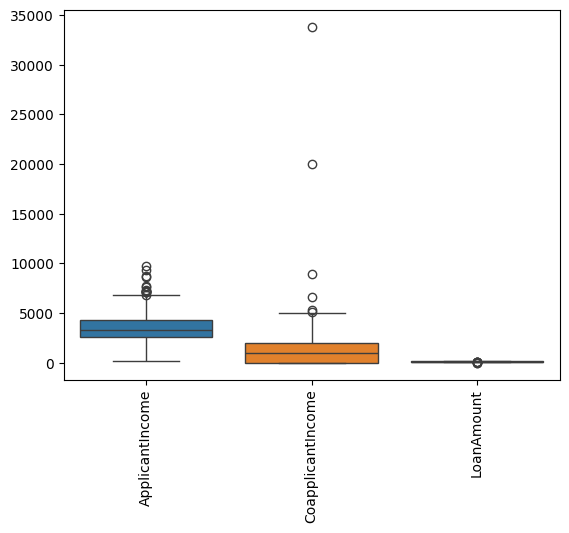

In [7]:
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

## Encoding Categorial Data

In [8]:
categ_col = data.select_dtypes(include=['object']).columns

# Initialize encoders
label_encoder = LabelEncoder()

# Encode each categorical column using Label Encoding for simplicity
encoded_data = data.copy()
for i in categ_col:
    encoded_data[i] = label_encoder.fit_transform(data[i])

# Display the first 5 rows of the encoded dataset
print(encoded_data)

     Loan_ID  Gender  Married  Dependents  Education  ApplicantIncome  \
0          0       1        1           1          0             4583   
1          1       1        1           0          0             3000   
2          2       1        1           0          1             2583   
3          3       1        0           0          0             6000   
4          4       1        1           0          1             2333   
..       ...     ...      ...         ...        ...              ...   
376      376       1        1           3          0             5703   
377      377       1        1           0          0             3232   
378      378       0        0           0          0             2900   
379      379       1        1           3          0             4106   
380      380       0        0           0          0             4583   

     CoapplicantIncome  LoanAmount  Property_Area  Loan_Status  
0               1508.0       128.0              0         

## Extract Dependent and Independent Variables

In [9]:
X = encoded_data.iloc[:,3:12]   #Independent variable
y = encoded_data['Loan_Status']     #dependent variable

## ## Statistical Analysis
### (Correlation,Describe) 

In [10]:
print(data.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       381.000000         381.000000  381.000000
mean       3579.845144        1277.275381  104.986877
std        1419.813818        2340.818114   28.358464
min         150.000000           0.000000    9.000000
25%        2600.000000           0.000000   90.000000
50%        3333.000000         983.000000  110.000000
75%        4288.000000        2016.000000  127.000000
max        9703.000000       33837.000000  150.000000


                   Loan_ID  Gender  Married  Dependents  Education  \
Loan_ID              1.000  -0.005   -0.048       0.079     -0.005   
Gender              -0.005   1.000    0.340       0.187      0.103   
Married             -0.048   0.340    1.000       0.338      0.041   
Dependents           0.079   0.187    0.338       1.000      0.123   
Education           -0.005   0.103    0.041       0.123      1.000   
ApplicantIncome      0.004   0.032   -0.044       0.147     -0.035   
CoapplicantIncome    0.058   0.102    0.081      -0.070     -0.043   
LoanAmount           0.006   0.061    0.142       0.083     -0.012   
Property_Area       -0.185   0.002    0.035       0.065     -0.087   
Loan_Status         -0.037  -0.014    0.092      -0.024     -0.056   

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_ID                      0.004              0.058       0.006   
Gender                       0.032              0.102       0.061   
Married               

<Axes: >

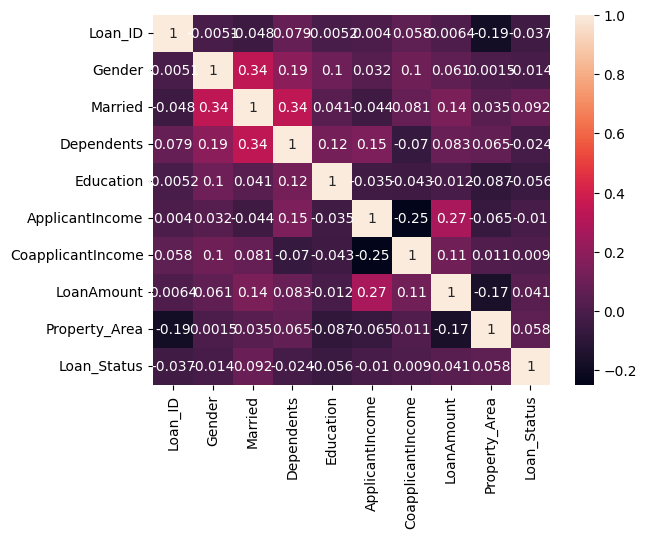

In [11]:
correlation=encoded_data.corr(numeric_only=True)
print(np.around(correlation,decimals=3))
sns.heatmap(correlation,annot=True)

## Split Train and Test Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Model

In [13]:
# Fitting the MLR model to the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set result
y_pred = model.predict(X_test)

# To compare the actual output values for X_test with the predicted value
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(data)

     Actual     Predicted
266       1  1.000000e+00
192       1  1.000000e+00
46        1  1.000000e+00
55        0  1.743073e-15
57        1  1.000000e+00
..      ...           ...
165       1  1.000000e+00
63        1  1.000000e+00
249       1  1.000000e+00
280       1  1.000000e+00
357       0 -7.987018e-15

[77 rows x 2 columns]


In [14]:
# predicting the accuracy score
score = r2_score(y_test,y_pred)
print("r2 score is ", score*100,"%")

r2 score is  100.0 %
